In [1]:
import pandas as pd
train_data = pd.read_csv("titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from pycaret.classification import *
exp_titanic = setup(data = train_data, target = 'Survived')

,Description,Value
0,Session id,3697
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


In [3]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8074,0.0000,0.6736,0.8009,0.7288,0.5812,0.5892,0.0680
et,Extra Trees Classifier,0.8073,0.8336,0.5900,0.8715,0.6973,0.5653,0.5920,0.1560
lr,Logistic Regression,0.8042,0.8514,0.6654,0.7937,0.7221,0.5729,0.5797,0.2790
lda,Linear Discriminant Analysis,0.8009,0.8519,0.6904,0.7717,0.7269,0.5711,0.5751,0.0730
nb,Naive Bayes,0.7386,0.8204,0.4482,0.7708,0.5600,0.3967,0.4277,0.0780
rf,Random Forest Classifier,0.7384,0.8473,0.3562,0.9057,0.5058,0.3742,0.4504,0.2100
catboost,CatBoost Classifier,0.7191,0.8249,0.3101,0.8807,0.4520,0.3219,0.4014,0.7140
ada,Ada Boost Classifier,0.7176,0.8097,0.3100,0.8730,0.4459,0.3175,0.3948,0.1030
lightgbm,Light Gradient Boosting Machine,0.7143,0.8032,0.3101,0.8550,0.4483,0.3124,0.3864,0.1500
gbc,Gradient Boosting Classifier,0.7126,0.7467,0.2976,0.8688,0.4361,0.3053,0.3847,0.1080


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=3697, solver='auto',
                tol=0.0001)

In [4]:
model = create_model('lightgbm', round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.71,0.86,0.25,1.00,0.40,0.29,0.41
1,0.75,0.79,0.38,0.90,0.53,0.39,0.46
2,0.68,0.74,0.21,0.83,0.33,0.21,0.30
3,0.65,0.80,0.17,0.67,0.27,0.13,0.19
4,0.73,0.95,0.29,1.00,0.45,0.34,0.45
5,0.69,0.76,0.25,0.86,0.39,0.26,0.34
6,0.71,0.77,0.38,0.75,0.50,0.33,0.36
7,0.71,0.83,0.33,0.80,0.47,0.31,0.37
8,0.74,0.71,0.42,0.83,0.56,0.40,0.45


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
type(model)

lightgbm.sklearn.LGBMClassifier

In [6]:
tuned_model = tune_model(model, round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.70,0.82,0.21,1.00,0.34,0.25,0.37
1,0.75,0.78,0.46,0.79,0.58,0.41,0.45
2,0.68,0.71,0.21,0.83,0.33,0.21,0.30
3,0.63,0.81,0.17,0.57,0.26,0.10,0.14
4,0.76,0.89,0.38,1.00,0.55,0.42,0.52
5,0.69,0.73,0.25,0.86,0.39,0.26,0.34
6,0.73,0.77,0.42,0.77,0.54,0.37,0.40
7,0.71,0.86,0.33,0.80,0.47,0.31,0.37
8,0.74,0.72,0.42,0.83,0.56,0.40,0.45


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [7]:
type(tuned_model)

lightgbm.sklearn.LGBMClassifier

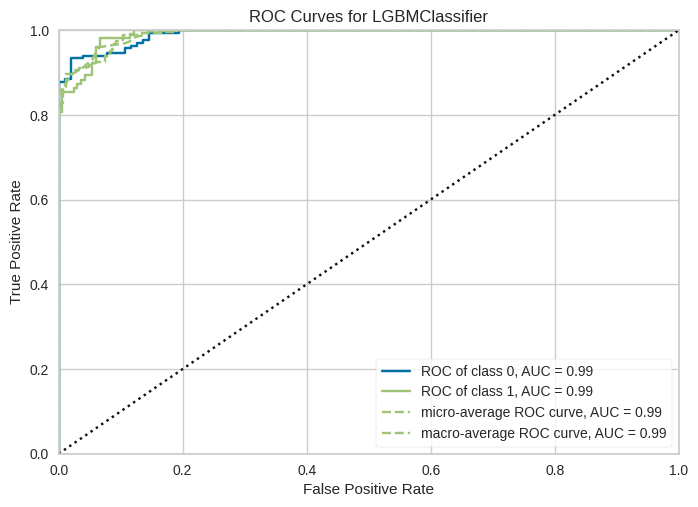

In [8]:
plot_model(model, plot = 'auc')

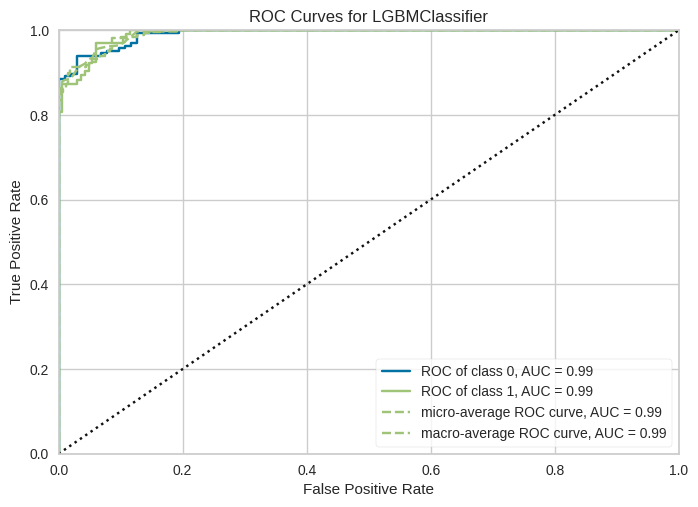

In [9]:
plot_model(tuned_model, plot = 'auc')

In [10]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
final_model = finalize_model(tuned_model)
data_unseen = pd.read_csv("titanic/test.csv")
result = predict_model(final_model, data = data_unseen)
result

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829200,NaN,Q,0,0.9990
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,NaN,S,0,0.9961
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q,0,0.9987
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662500,NaN,S,0,0.9983
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287500,NaN,S,0,0.9875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,0,0.9983
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900002,C105,C,1,0.9612
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,0,0.9988
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,0,0.9983
